In [39]:
from HelpFunctions.date_and_time import most_recent_thursday
from Energy.HelpFunctions.get_energy_data import get_energy_data, prepare_data

df = get_energy_data(force_return=True)
df = prepare_data(df)
start_date_excl = most_recent_thursday(df)
df = df.loc[df.index < start_date_excl]


/Users/elias/Desktop/PTSFC/Energy/HelpFunctions/get_energy_data.py:17: UserWarning: The data is not up to date anymore. Please call fetch_energy_data
  warnings.warn("The data is not up to date anymore. Please call fetch_energy_data", UserWarning)


# Normal fourier analysis & extrapolation

In [64]:
import numpy as np
import pylab as pl
from numpy import fft
    
def fourierExtrapolation(x, n_predict, n_harm = 4000   ):
    n = x.size
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t

In [96]:
from HelpFunctions.date_and_time import split_time

df_before, df_after = split_time(df, num_weeks=1)
df_before, df_after = split_time(df_before, num_weeks=1)
df_before, df_after = split_time(df_before, num_weeks=1)
df_before, df_after = split_time(df_before, num_weeks=1)




x = np.array(list(df_before['gesamt']))
n_predict = 10000
extrapolation = fourierExtrapolation(x, n_predict, n_harm=700)

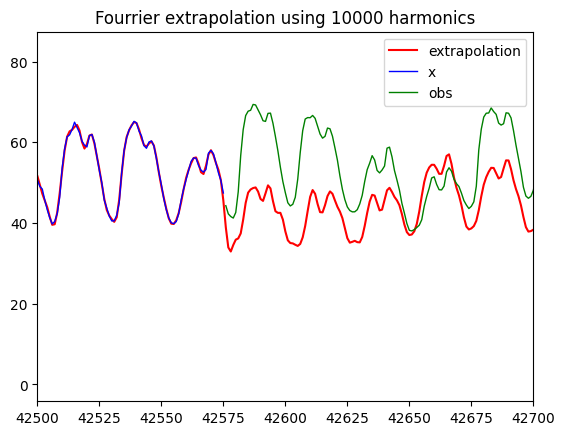

In [100]:
for harmonics in range(10000, 10100, 100):
    extrapolation = fourierExtrapolation(x, n_predict, n_harm=harmonics)
    pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
    pl.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 1)
    pl.plot(np.arange(x.size, x.size+len(list(df_after['gesamt']))), list(df_after['gesamt']), 'g', label = 'obs', linewidth = 1)
    pl.legend()
    pl.xlim(42500, 42700)
    pl.title(f'Fourrier extrapolation using {harmonics} harmonics')
    pl.savefig(f'../plots/fourrier_h{harmonics}.png')
    pl.show()

---

[0.03943945 0.60724315 0.30379208 0.09153312 0.95322833 0.58279332
 0.58584166 0.67711117 0.1175137  0.57913779]
[('2023-01-01', 0.03943945) ('2023-01-02', 0.60724315)
 ('2023-01-03', 0.30379208) ('2023-01-04', 0.09153312)
 ('2023-01-05', 0.95322833) ('2023-01-06', 0.58279332)
 ('2023-01-07', 0.58584166) ('2023-01-08', 0.67711117)
 ('2023-01-09', 0.1175137 ) ('2023-01-10', 0.57913779)]
